$\textbf{Student:}$ Carlos Daniel Fontes da Silva\
$\textbf{E-mail:}$ carlos.fontes@ee.ufcg.edu.br

# Transfer Matrix Method

This notebook shows a demonstration of the Transfer Matrix Method for field calculus in multilayer waveguides. This method was firstly introduced in the article $\textit{"The complex propagation constant of multilayer waveguides: an algorith for a personal computer"}$, by Schlereth and Tacke (1990).
Be a multilayer waveguide with Z layers as shows the figure below:

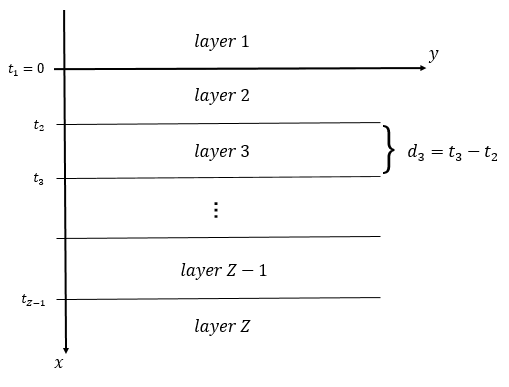

The electric field in a TE solution in a planar dielectric waveguide has only the $E_y$ component. In a general form, the Helmholtz equation in a layer $j$ with refraction index $n_j$ can be written as:

$$\dfrac{d^2E_y^j}{dx^2}  - (\beta^2_j-k_o^2n_j^2)E_y^j = 0 \to E_y^j = A_je^{\alpha_j(x-t_{j-1})} + B_je^{-\alpha_j(x-t_{j-1})}$$

The boundaries conditions predict that the electric field has to be the same in the junction interfaces of the layers, and by the equations of TE solution, its derivative in $x$ has this property too, so:

$$E_y^j(t_j) = E_y^{j+1}(t_{j})$$
$$\dfrac{dE_y^j(t_j)}{dx} = \dfrac{dE_y^{j+1}(t_j)}{dx}$$

Applying this conditions to the solution, and being $\sigma_j = \alpha_j d_j = \alpha_j(t_{j} - t_{j-1})$ we can find:

$$
A_je^{\sigma_j} + B_je^{-\sigma_j} = A_{j+1} + B_{j+1} 
$$
$$
A_j\dfrac{\alpha_j}{\alpha_{j+1}}e^{\sigma_j} - B_j\dfrac{\alpha_j}{\alpha_{j+1}}e^{-\sigma_j} = A_{j+1} - B_{j+1}
$$

We can reorganize this in a matrix format this way:

$$
\begin{bmatrix}
    A_{j+1} \\
    B_{j+1} 
\end{bmatrix}
=\dfrac{1}{2}
\begin{bmatrix}
    \Big( 1 + \dfrac{\alpha_j}{\alpha_{j+1}} \Big)e^{\sigma_j} & \Big( 1 - \dfrac{\alpha_j}{\alpha_{j+1}} \Big)e^{-\sigma_j} \\
    \Big( 1 - \dfrac{\alpha_j}{\alpha_{j+1}} \Big)e^{\sigma_j} & \Big( 1 + \dfrac{\alpha_j}{\alpha_{j+1}} \Big)e^{-\sigma_j}
\end{bmatrix}
\cdot
\begin{bmatrix}
    A_j \\
    B_j
\end{bmatrix}
$$

Note that:

$$
\begin{bmatrix}
    A \\
    B 
\end{bmatrix}_{j+1}
=
T_j\cdot
\begin{bmatrix}
    A \\
    B
\end{bmatrix}_j
\to
\begin{bmatrix}
    A \\
    B
\end{bmatrix}_j
=
T_{j-1}\cdot
\begin{bmatrix}
    A \\
    B
\end{bmatrix}_{j-1}
= T_{j-1}\cdots T_2 \cdot T_1 \cdot
\begin{bmatrix}
    A \\
    B
\end{bmatrix}_1
$$

So, being now $j = Z$, we'll have:

$$
\begin{bmatrix}
    A \\
    B
\end{bmatrix}_Z
= \prod_{k\ =\ Z-1}^1 T_k \cdot 
\begin{bmatrix}
    A \\
    B
\end{bmatrix}_1
\to
\begin{bmatrix}
    A \\
    B
\end{bmatrix}_Z
= T_{WG} \cdot 
\begin{bmatrix}
    A \\
    B
\end{bmatrix}_1 
\, ,\ T_{WG} = 
\begin{bmatrix}
    t_{11} & t_{12} \\
    t_{21} & t_{22}
\end{bmatrix}
$$

Considering that the field must be attenuated in the first and last layer, so:

$$
\begin{bmatrix}
    0 \\
    B
\end{bmatrix}_Z
=
\begin{bmatrix}
    t_{11} & t_{12} \\
    t_{21} & t_{22}
\end{bmatrix}
\cdot
\begin{bmatrix}
    A \\
    0
\end{bmatrix}_1
\to t_{11}(\beta) = 0
$$

Solving this last equation will give us the TE propagated modes and their effective refraction index. Below, we will solve a problem present in the refered article, where a laser with five layers 

In [27]:
import numpy as np
from numpy.lib.scimath import sqrt as csqrt
import matplotlib.pyplot as plt

In [28]:
n1 = 2.6 - 1j*36.5   # Metal layer
n2 = 4.6             # Confinement layer
n3 = 5.2             # Active layer
n4 = 4.6             # Confinement layer
n5 = 5.2 - 1j*0.01   # Substrate

n = np.array([n1, n2, n3, n4, n5])
d = 1e-6*np.array([0, 2, 0.5, 4, 1.5])
t = np.array([-d[1], 0, d[1], d[2] + d[1], d[3] + d[2] + d[1], d[4] + d[3] + d[2] + d[1]])
N = 1000
x = np.zeros((len(n), N))

In [29]:
λ = 6.7e-6
k0 = 2*np.pi/λ
neff = np.linspace(1.0001*n2, 0.999*n3, N)
β = neff*k0

In [30]:
α = np.zeros((len(n), N), complex)
σ = np.zeros((len(n), N), complex)

for j in range(len(n)):
    α[j, :] = csqrt(β**2 - (k0*n[j])**2)
    σ[j, :] = α[j, :]*d[j]

[4.74205451]


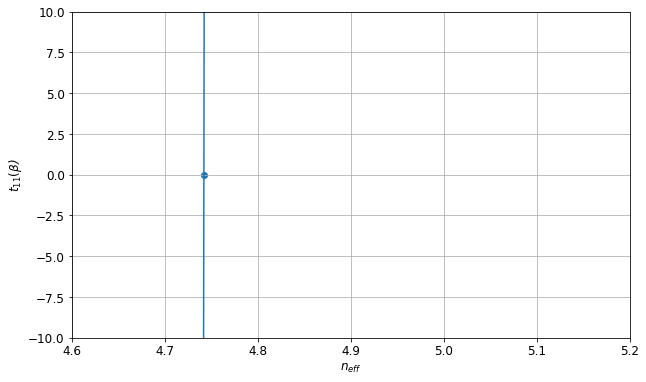

In [31]:
Twg = np.array([[np.ones(N), np.zeros(N)], 
                [np.zeros(N), np.ones(N)]], complex)

for j in reversed(range(len(n) - 1)):
    Tj = 0.5*np.array([ [(1 + α[j,:]/α[j+1,:])*np.exp(σ[j, :]), (1 - α[j,:]/α[j+1,:])*np.exp(-σ[j, :])],   
                      [(1 - α[j,:]/α[j+1,:])*np.exp(σ[j, :]), (1 + α[j,:]/α[j+1,:])*np.exp(-σ[j, :])] ] )
    
    for i in range(len(β)):
        Twg[:,:,i] = np.dot(Twg[:,:,i], Tj[:,:,i])

t11 = np.real(Twg[0,0,:])
zero = np.where( t11 == abs(t11).min()); Neff = neff[zero]

print(Neff)

plt.figure(figsize = (10, 6))
plt.plot(neff, t11)
plt.scatter(Neff, np.zeros(len(Neff)))
plt.xlabel(r'$n_{eff}$',fontsize = 12, fontstyle = 'italic')
plt.ylabel(r'$t_{11}(\beta$)',fontsize = 12, fontstyle = 'italic')
plt.tick_params(axis = 'both', labelsize = 12)
plt.ylim(-10, 10)
plt.xlim(n2, n3)
plt.grid()

## Field profile

In [32]:
AB = np.zeros((2, len(n)), complex)
AB[:,0] = np.array([1, 0])

In [33]:
α  = np.zeros(len(n), complex)
σ  = np.zeros(len(n), complex)
Tj = np.zeros((2, 2), complex)
E = np.zeros((len(n), N), complex)

β = k0*Neff

for j in range(len(n)):
    α[j] = csqrt(β**2 - (k0*n[j])**2)
    σ[j] = α[j]*d[j]
    x[j,:] = np.linspace(t[j],t[j+1],N)

for j in range(len(n)-1):
    Tj = 0.5*np.array([ [(1 + α[j]/α[j+1])*np.exp(σ[j]), (1 - α[j]/α[j+1])*np.exp(-σ[j]) ],
                        [(1 - α[j]/α[j+1])*np.exp(σ[j]), (1 + α[j]/α[j+1])*np.exp(-σ[j]) ]])
    AB[:,j+1] = np.dot(Tj, AB[:,j])

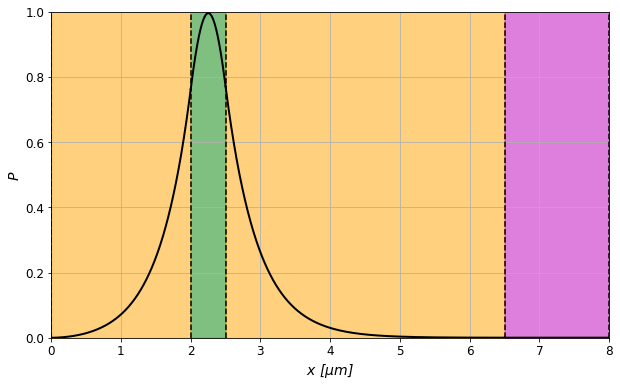

In [34]:
plt.figure(figsize = (10,6))
t[0] = 0

color = ['b','orange','g','orange','m']

for j in range(len(n)):
    E[j,:] = AB[0,j]*np.exp(α[j]*(x[j,:] - t[j])) + AB[1,j]*np.exp(-α[j]*(x[j,:] - t[j]))

for j in range(len(n)):
    plt.plot(1e6*x[j,:],(np.real(E[j,:])/np.max(abs(E)))**2, color = 'k', lw = 2)
    plt.fill_between(1e6*x[j,:], 0, 1., where = x[j,:] < max(x[j,:]), color = color[j], alpha=0.5)
    plt.axvline(1e6*t[j+1], color = 'k', ls = '--')

plt.xlabel('x [$\mu m$]',fontsize = 14, fontstyle = 'italic')
plt.ylabel('P', fontsize = 14, fontstyle = 'italic')
plt.tick_params(axis = 'both', labelsize = 12)
plt.xlim(0,1e6*max(x[len(n)-1,:]))
plt.ylim(0, 1)
plt.grid()